In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
os.chdir('C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy')

data = pd.read_csv('RandomRandom.txt')
data = data.loc[:, data.columns!='Unnamed: 0']
#data = data[:13800]  #AdaptiveRandom and RandomAdaptive cutoff: 13800
data.tail(5)

,P10,P11,P14,P15,P18,P22,P23,P26,P27,P3,P30,P31,P6,P7
14495,0.616435,0.665982,0.840807,0.487603,0.458140,0.474424,0.209670,0.266327,0.336942,0.285610,0.506645,0.148169,0.410047,0.452252
14496,0.615951,0.658071,0.837567,0.486465,0.460250,0.475035,0.209905,0.265000,0.339866,0.286420,0.505091,0.148970,0.410047,0.458728
14497,0.614595,0.649954,0.833281,0.484684,0.462769,0.475463,0.210234,0.263393,0.342789,0.286662,0.503619,0.150172,0.410185,0.467037
14498,0.612803,0.642043,0.826278,0.482605,0.466284,0.475830,0.210516,0.261926,0.345713,0.286581,0.501983,0.151374,0.410601,0.475652
14499,0.621374,0.634029,0.817393,0.480329,0.469623,0.475891,0.210705,0.260390,0.348479,0.286420,0.500470,0.152817,0.411085,0.484389


# DFA

## Mean Centering the Data

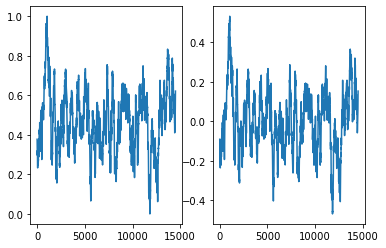

In [55]:

p1 = np.array(data['P10'])

plt.plot(figsize = (15,15))
plt.subplot(1,2,1)
plt.plot(p1)

plt.subplot(1,2,2)
p1_centered = p1 - np.mean(p1)
plt.plot(p1_centered)

## Cumulative Sum

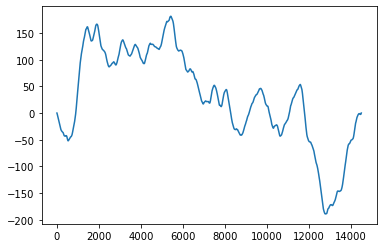

In [56]:

cumulative = np.cumsum(p1_centered)
plt.plot(cumulative)

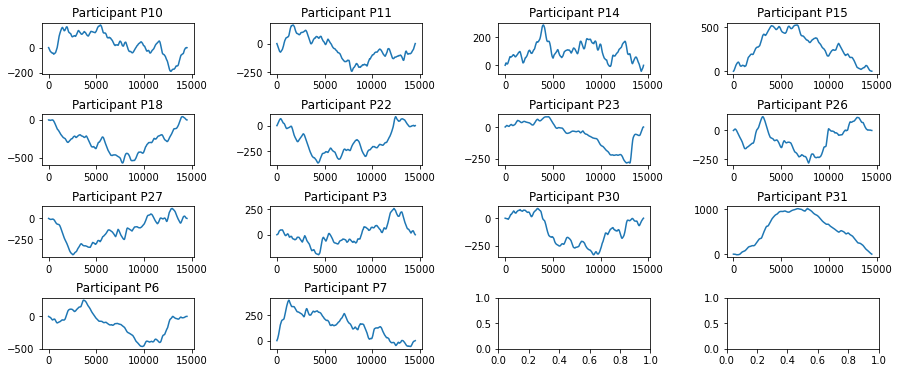

In [57]:
fig, axs = plt.subplots(4,4, figsize=(15, 6))
fig.subplots_adjust(hspace = .8, wspace=.5)

axs = axs.ravel()

participants = data.columns


for i in range(len(participants)):
    datapoint = data[participants[i]]
    data_centered =  datapoint - np.mean(datapoint)
    cumulative = np.cumsum(data_centered)
    
    axs[i].plot(cumulative)
    axs[i].set_title(str('Participant ' + str(participants[i])))



## Defining Scales in Logspace

Text(0, 0.5, 'epoch length (s)')

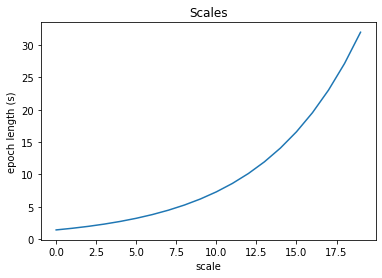

In [209]:
#our epochs will be this long
scales = np.logspace(0.5, 5, num=20, base=2)

plt.plot(scales)
plt.title('Scales')
plt.xlabel('scale')
plt.ylabel('epoch length (s)')

## Cutting Data into Epochs

In [69]:
#sample freq = 256
#This function determines in how many epochs the data should be split based on the time window

    

Text(0, 0.5, 'Amplitude')

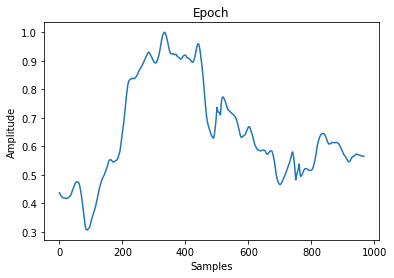

In [210]:

#getScales and getParticipant return a list of eeg signals split into detrended epochs

def getSplit(data, epoch_sec):
    duration = data.shape[0]
    epoch = 250*epoch_sec
    
    division = int(duration/epoch)
    return division
    

def getScales(data, scale):
    return np.array_split(p1,(getSplit(p1,scales[scale])))


def getParticipant(data):
    out = []


    for i in range(len(scales)):
        out.append(getScales(data,i))
       
    arr = np.array(out, dtype = object)
      
        
    return arr


p1_scales = getParticipant(p1)


scalenum = 6 
window = 0

plt.plot(p1_scales[scalenum][window]) #change here to 1) scale, 2) the Nth window in that scale
plt.title('Epoch')
plt.xlabel('Samples')
plt.ylabel('Amplitude')


In [211]:
print(len(p1_scales[2]))
#scale 0 has 41 windows
#scale 1 has 29
#scale 2 has 20 
#and so on...

29


## Detrending the signal

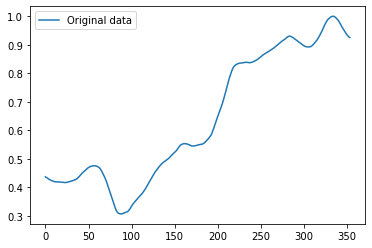

In [212]:
import numpy as np

# Detrend the data using scipy.signal.detrend
detrended_data = signal.detrend(p1_scales[0][0])

# Plot the original and detrended data
import matplotlib.pyplot as plt
plt.plot(p1_scales[0][0], label="Original data")

plt.legend()
plt.show()

## RMS and Detrend

Text(0.5, 1.0, 'Detrended')

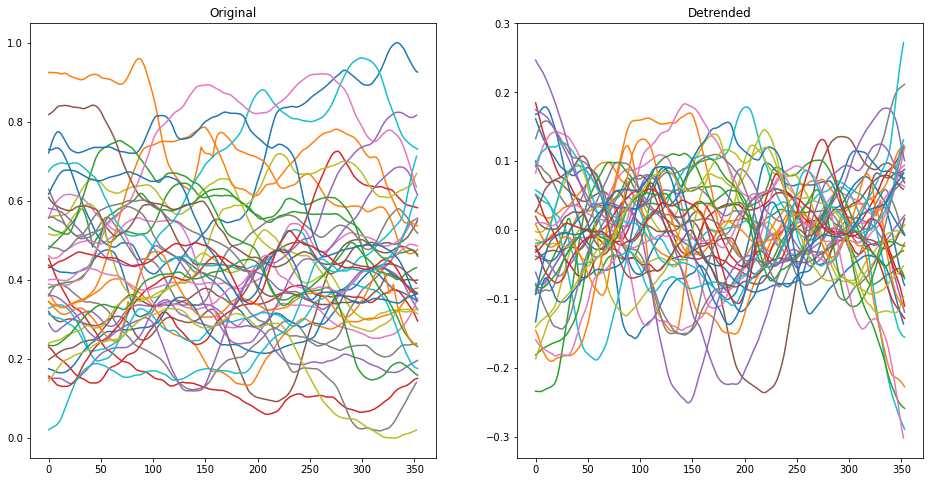

In [213]:
scale = 0

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)

for i in range(len(p1_scales[scale])):
    plt.plot(p1_scales[scale][i], label="Original data")
    
plt.title('Original')
    
plt.subplot(1,2,2)


for i in range(len(p1_scales[scale])):
    detrended_data = signal.detrend(p1_scales[scale][i])
    
    plt.plot(detrended_data, label="Detrended data")
    
plt.title('Detrended')

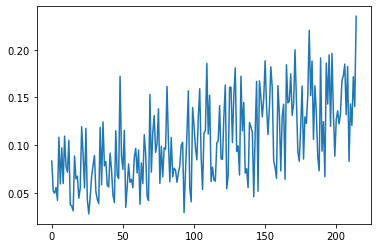

In [214]:
rms = []
def RMS(data):
    return np.sqrt(np.mean(data**2))

for scale in range(10):
    for i in range(len(p1_scales[scale])):
        detrended_data = signal.detrend(p1_scales[scale][i])
        rms.append(RMS(detrended_data))
        
plt.plot(rms)

## Linear Fit RMS and Logspace

In [216]:
print(len(rms))

215


Fit coefficients: [0.00306014 0.07413063]


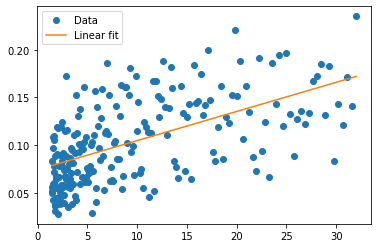

In [217]:

# Generate some sample data
x = np.logspace(0.5, 5, num=215, base=2)
y = rms 

# Perform linear fit using numpy.polyfit
fit_coeffs = np.polyfit(x, y, 1)  # fit a first-order (linear) polynomial

# Print the fit coefficients (slope and intercept)
print("Fit coefficients:", fit_coeffs)

# Calculate the fitted values
fit_values = np.polyval(fit_coeffs, x)

# Plot the data and the linear fit
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label="Data")
plt.plot(x, fit_values, label="Linear fit")
plt.legend()
plt.show()